# Classifying Palmer Penguins
Source Code: [CHECK LINK](https://github.com/KatieMacalintal/KatieMacalintal.github.io/blob/main/posts/palmer-penguins)

## Explore
Construct at least one interesting **displayed figure** (e.g. using seaborn) and at least one interesting **displayed table** (e.g. using pandas.groupby().aggregate). Make sure to include a helpful discussion of both the figure and the table. Don’t just show the result: explain what you learned about the data from these products.

## Model
Find **three features** of the data and a model trained on those features which achieves **100% testing accuracy**. You must obtain your three features through a **reproducible process**. That is, you can’t just pick them: you need to code up some kind of search in order to obtain them.
- One feature must be qualitative (like Island or Clutch Completion).
- The other two features must be quantitative (like Body Mass (g) or Culmen Depth (mm)).

## Evaluate
Show the decision regions of your finished model, split out by the qualitative feature.

# ACTUALLY EXPERIMENTING

## Download training data

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# Load training data
train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,27,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,11/29/07,44.5,14.3,216.0,4100.0,NaN,7.96621,-25.69327,NaN
1,PAL0708,22,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N41A2,Yes,11/27/07,45.1,14.5,215.0,5000.0,FEMALE,7.63220,-25.46569,NaN
2,PAL0910,124,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N67A2,Yes,11/16/09,41.4,18.5,202.0,3875.0,MALE,9.59462,-25.42621,NaN
3,PAL0910,146,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N82A2,Yes,11/16/09,39.0,18.7,185.0,3650.0,MALE,9.22033,-26.03442,NaN
4,PAL0708,24,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N85A2,No,11/28/07,50.6,19.4,193.0,3800.0,MALE,9.28153,-24.97134,NaN


## Data Preparation

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

# Prepare qualitative data and mark species as labels
def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

# Prepare training data
X_train, y_train = prepare_data(train)
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
1,45.1,14.5,215.0,5000.0,7.63220,-25.46569,1,0,0,1,0,1,1,0
2,41.4,18.5,202.0,3875.0,9.59462,-25.42621,0,0,1,1,0,1,0,1
3,39.0,18.7,185.0,3650.0,9.22033,-26.03442,0,1,0,1,0,1,0,1
4,50.6,19.4,193.0,3800.0,9.28153,-24.97134,0,1,0,1,1,0,0,1
5,33.1,16.1,178.0,2900.0,9.04218,-26.15775,0,1,0,1,0,1,1,0


## Question
**Predict Question**: Can we predict the species of a penguin given information on their bodies, etc? 

**QUESTIONS ABOUT HOW THE FEATURES INFLUENCE THE LABEL**  
Look at the features and ask questions about whether they influence what label they will be: 

In [6]:
# INSPECTING DATA 
print("BASE RATES") 
print("y_train:", y_train)
print("species 0 count:", np.count_nonzero(y_train == 0), "percentage:", np.count_nonzero(y_train == 0)/np.size(y_train)) 
print("species 1 count:", np.count_nonzero(y_train == 1), "percentage:", np.count_nonzero(y_train == 1)/np.size(y_train)) 
print("species 2 count:", np.count_nonzero(y_train == 2), "percentage:", np.count_nonzero(y_train == 2)/np.size(y_train)) 

# WAIT SO IS OUR BASE RATE THE AVERAGE OF THESE? 

BASE RATES
y_train: [2 0 0 1 0 0 0 2 0 2 0 0 1 1 1 2 1 2 2 0 0 1 2 2 0 2 0 1 1 0 0 0 2 0 2 0 0
 0 2 0 0 0 0 0 1 0 2 2 2 1 1 1 2 2 2 0 2 0 2 2 2 0 2 1 0 0 2 0 2 2 0 2 0 0
 2 1 1 2 2 0 1 2 2 2 1 0 1 0 0 0 0 1 2 0 2 0 0 2 0 2 2 0 0 1 0 2 0 2 0 2 0
 0 2 2 0 2 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 0 2 2 0 1 2 1 2 0 0 0 2 0 0 1 1
 0 2 1 2 2 2 2 0 2 0 0 0 0 1 0 0 2 2 0 2 0 1 0 1 2 1 1 1 2 0 1 0 0 1 0 0 2
 0 1 1 0 1 1 0 0 1 0 2 1 2 0 1 2 0 2 2 1 1 0 2 0 0 2 1 0 2 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 2 1 2 2 1 2 0 1 0 0 0 0 1 2 0 1 1 0 2 0 1 1 1 0 2 0 2 2]
species 0 count: 106 percentage: 0.4140625
species 1 count: 55 percentage: 0.21484375
species 2 count: 95 percentage: 0.37109375


## Choosing Features

Might need `combinations function` from the `itertools package`

**USE CROSS-VALIDATION!** Simplest way to guard against overfitting issues and get a good feeling for how your model might do on unseen data.

In [7]:
# WHAT IS THIS CODE DOING??? 

# GIVEN STARTER CODE

from itertools import combinations

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Sex"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    print(cols)
    # you could train models and score them here, keeping the list of 
    # columns for the model that has the best score. 
    # 

['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Flipper Length (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Depth (mm)', 'Flipper Length (mm)']


## Model Choices 
Remember: We are working with **3 label** now not 2. 

In [8]:
from sklearn.linear_model import LogisticRegression

# this counts as 3 features because the two Clutch Completion 
# columns are transformations of a single original measurement. 
# you should find a way to automatically select some better columns
# as suggested in the code block above
cols = ["Flipper Length (mm)", "Body Mass (g)", "Clutch Completion_No", "Clutch Completion_Yes"]

LR = LogisticRegression()
LR.fit(X_train[cols], y_train)
LR.score(X_train[cols], y_train)

0.6640625

Since scikit-learn makes it so easy to experiment, this blog post is a great opportunity to explore some out-of-the-box models that we haven’t discussed in class. I’d suggest:

- from sklearn.tree import DecisionTreeClassifier. This one has a max_depth parameter that controls the complexity of the model. Use cross-validation to find a good value of the parameter.
- from sklearn.ensemble import RandomForestClassifier. State-of-the-art before the rise of neural networks.
- from sklearn.svm import SVC. Another state-of-the-art algorithm before the rise of neural networks. Has a parameter gamma that controls the complexity of the model. Again, use cross-validation to select gamma. It’s important to let gamma cover a wide range of values, e.g. gamma = 10**np.arange(-5, 5).

You can find a more thorough listing of models on this [page](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

## NEED TO TEST AND PLOT DECISION REGIONS

Has a link to use for testing later 

## Plotting Decision Regions 
Code provided with ... 

In [9]:
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import numpy as np

def decision_region_panel(X, y, model, qual_features):  
  p = len(qual_features)
  fig, axarr = plt.subplots(1, p, figsize=(4*p,4))
  for i in range(p):

      filler_feature_values = {2+j: 0 for j in range(p)}

      filler_feature_values.update({2+i: 1})

      ix = X[qual_features[i]] == 1

      ax = axarr[i]

      plot_decision_regions(np.array(X[ix]), y[ix], clf=model,
                            filler_feature_values=filler_feature_values,
                            filler_feature_ranges={2+j: 0.1 for j in range(p)},
                            legend=2, ax=ax)

      ax.set_xlabel(X.columns[0])
      ax.set_ylabel(X.columns[1])

      handles, labels = ax.get_legend_handles_labels()
      ax.legend(handles, 
          ["Adelie", "Chinstrap", "Gentoo"], 
           framealpha=0.3, scatterpoints=1)

  # Adding axes annotations
  fig.suptitle(f'Accuracy = {model.score(X, y).round(3)}')
  plt.tight_layout()
  plt.show()

/Users/katiemacalintal/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/katiemacalintal/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


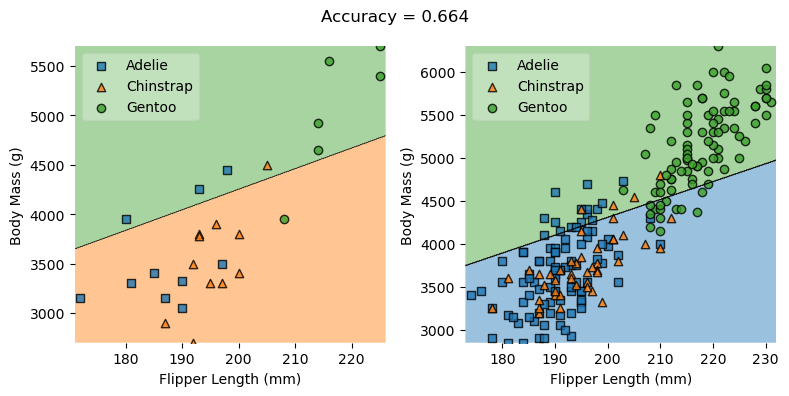

In [10]:
qual_features = ["Clutch Completion_No", "Clutch Completion_Yes"]
decision_region_panel(X_train[cols], y_train, LR, qual_features)